# Exploring the General Social Survey
### Siyi Fan

## Part1 Lab notebook

### Previewing the survey data

In [98]:
import pandas as pd

df = pd.read_csv("gss2012.csv")
df.head()

,year,id,wrkstat,wrkslf,wrkgvt,marital,sibs,childs,age,educ,...,south,divlaw2,age.f,mslm_spk.high,mslm_spk.yes,grass.legal,age2,relig2,dem,science_quiz.f
0,2012,1.0,WORKING PART TIME,SOMEONE ELSE,PRIVATE,Never married,1.0,0.0,22.0,4 years,...,Nonsouth,More difficult,22.0,0.0,0.0,NaN,<=30,Catholic,0.0,NaN
1,2012,2.0,WORKING PART TIME,SOMEONE ELSE,PRIVATE,Never married,2.0,0.0,21.0,12th grade,...,Nonsouth,NaN,21.0,0.0,0.0,100.0,<=30,Catholic,0.0,7.0
2,2012,3.0,WORKING FULL TIME,SOMEONE ELSE,PRIVATE,Married,1.0,2.0,42.0,12th grade,...,Nonsouth,NaN,42.0,1.0,100.0,100.0,>=31,Protestant,0.0,10.0
3,2012,4.0,NaN,SOMEONE ELSE,PRIVATE,Married,2.0,2.0,49.0,1 yr coll,...,Nonsouth,Same/easier,49.0,NaN,NaN,100.0,>=31,Protestant,0.0,NaN
4,2012,5.0,RETIRED,SOMEONE ELSE,GOVERNMENT,Separated,0.0,3.0,70.0,4 years,...,Nonsouth,Same/easier,70.0,NaN,NaN,0.0,>=31,Protestant,1.0,4.0


### 1. Plotting histograms

1) Age Distribution
Question addressed on Respondent's age. With more bins, we can spot more details. 

Text(0,0.5,'Freq')

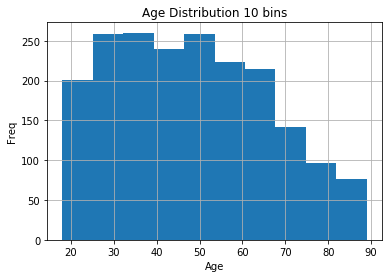

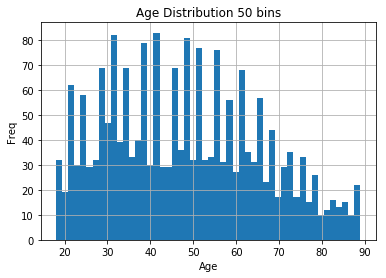

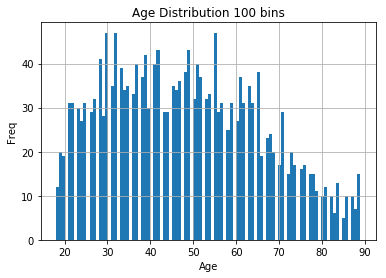

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

g1=pd.DataFrame.hist(df, column="age", bins = 10)
plt.title('Age Distribution 10 bins')
plt.xlabel('Age')
plt.ylabel('Freq')

g2=pd.DataFrame.hist(df, column="age", bins = 50)
plt.title('Age Distribution 50 bins')
plt.xlabel('Age')
plt.ylabel('Freq')

g3=pd.DataFrame.hist(df, column="age", bins = 100)
plt.title('Age Distribution 100 bins')                    
plt.xlabel('Age')
plt.ylabel('Freq')


2) Marital Status and Highest Degree
Question addressed on martial status: Are you currently--married, widowed, divorced, separated, or have you never been married?
Question addressed on respondent's highest education degree.

Text(0,0.5,'count')

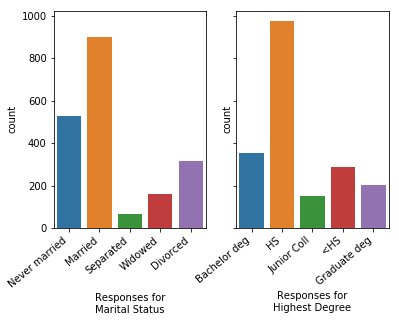

In [7]:
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
g1=sns.countplot(data = df,x = 'marital', ax=ax1)
g2=sns.countplot(data = df,x = 'degree', ax=ax2)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
g1.set_xlabel('Responses for\nMarital Status')
g2.set_xlabel('Responses for\nHighest Degree')
plt.ylabel('count')

3) Respondents astrological sign

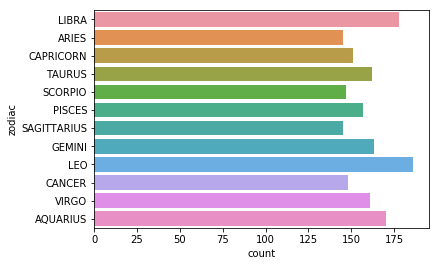

In [8]:
sns.countplot(y="zodiac", data=df) 

4) Region of interview

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

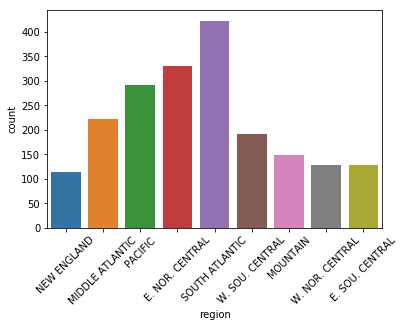

In [9]:
sns.countplot(x="region", data=df) 
plt.xticks(rotation='45')

5) Opinion of how people get ahead and their education backgrounds

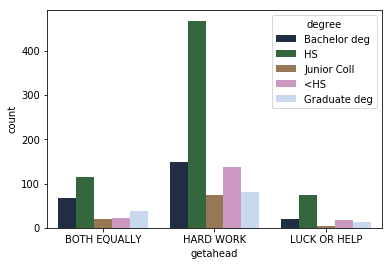

In [10]:
sns.countplot(x="getahead", hue="degree", data=df, palette="cubehelix")

6) Opinion of how people get ahead and gender

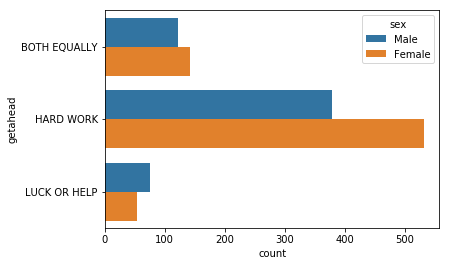

In [11]:
sns.countplot(y="getahead", hue="sex", data=df)

7) Comparing the distributions of education degree and viewpoints on gunlaw

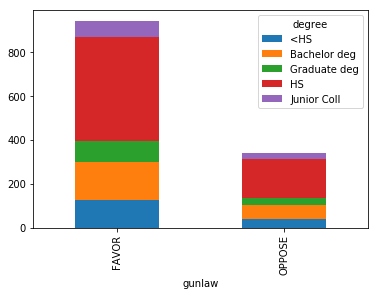

In [12]:
gb = df.groupby([ 'gunlaw', 'degree']).size().unstack()
gb.plot.bar(stacked=True)

### 2 Plotting bar charts

8) Marital status distribution

Text(0,0.5,'count')

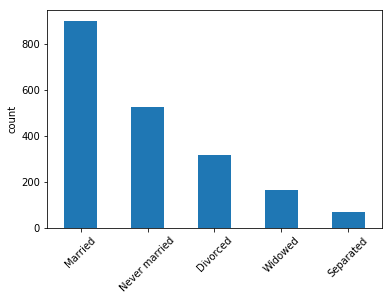

In [13]:
df['marital'].value_counts().plot(kind='bar', align='center')
plt.xticks(rotation='45')
plt.ylabel('count')

9) Total family income

Text(0,0.5,'count')

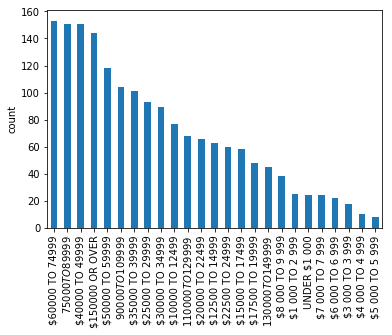

In [14]:
df['income06'].value_counts().plot(kind='bar')
plt.xticks(rotation='90')
plt.ylabel('count')

### 3 Plotting boxplot

10) Comparing the number of sibs and childs by using boxplots.
Both plots suggest that the medians are all between 0-5 and the variations are similar. However, "sibs" have more extreme values than "childs". I think the reason behind is that older generations tend to have more children than today's parents. 

Text(0,0.5,'count')

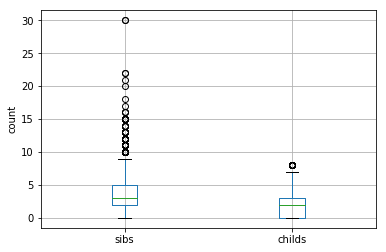

In [15]:
df.boxplot(['sibs', 'childs'])
plt.ylabel('count')

### 4. Violin plot

11) Comparing the peak of "the number of childs" among different "highest education degree" groups.

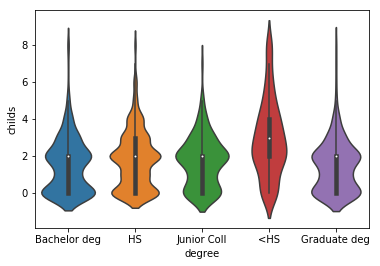

In [16]:
sns.violinplot(df['degree'],df['childs'])

### 5. Plotting scatterplots

12) The relationship between age and the number of childs. 

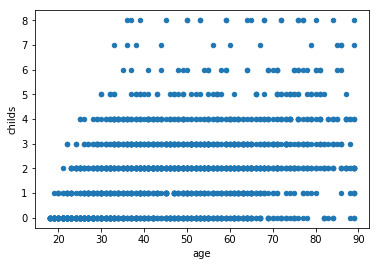

In [17]:
df.plot.scatter('age', 'childs') 

13) The relationship between age and hours per day watching TV.  

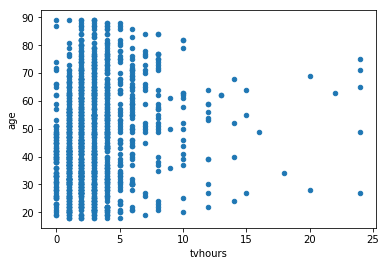

In [18]:
df.plot.scatter('tvhours','age') 

### 6. Strip Plot

14) viewpoints on age and the frequency of praying.

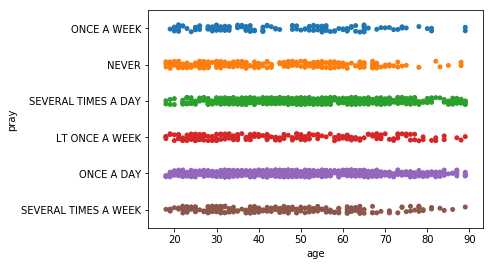

In [19]:
sns.stripplot(x = "age", y = "pray", data = df, jitter = True);

### 6. Swarm Plots

15) Distribution of general happiness and the number of childs.

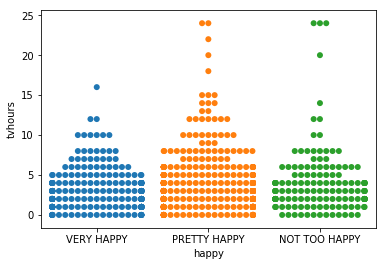

In [20]:
sns.swarmplot(x="happy", y="tvhours", data=df, size=6)

16) Draw swarms of observations on top of a box plot. 

Text(0,0.5,'count')

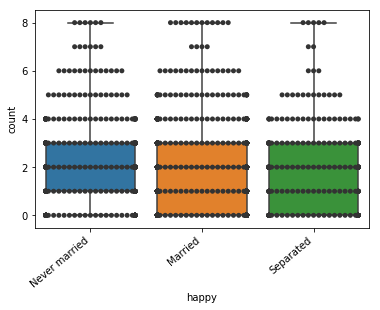

In [21]:
ax = sns.boxplot(x="happy", y="childs", data=df, whis=np.inf)
ax = sns.swarmplot(x="happy", y="childs", data=df, color=".2")
ax.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
plt.ylabel('count')

17) Draw swarms of observations on top of a violin plot.

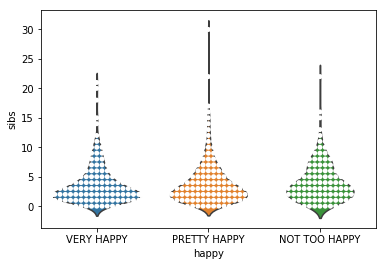

In [22]:
sns.violinplot(x="happy", y="sibs", data=df, inner=None)
ax = sns.swarmplot(x="happy", y="sibs", data=df,
                   color="white", edgecolor="gray")

18) Distribution of degree, age, and race with race as a hue.

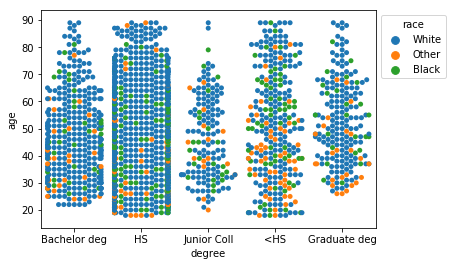

In [23]:
sns.swarmplot(x="degree", y="age", hue="race", data=df); 
plt.legend(title="race", bbox_to_anchor=(1, 1))

### 7. Multiple windows plot

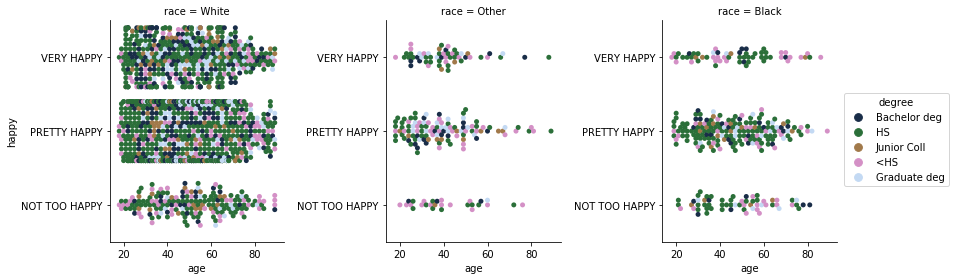

In [24]:
sns.factorplot(x="age", y="happy", hue="degree", col="race", data=df, kind="swarm", palette='cubehelix')

20) Religion and viewpoints on sex before marriage

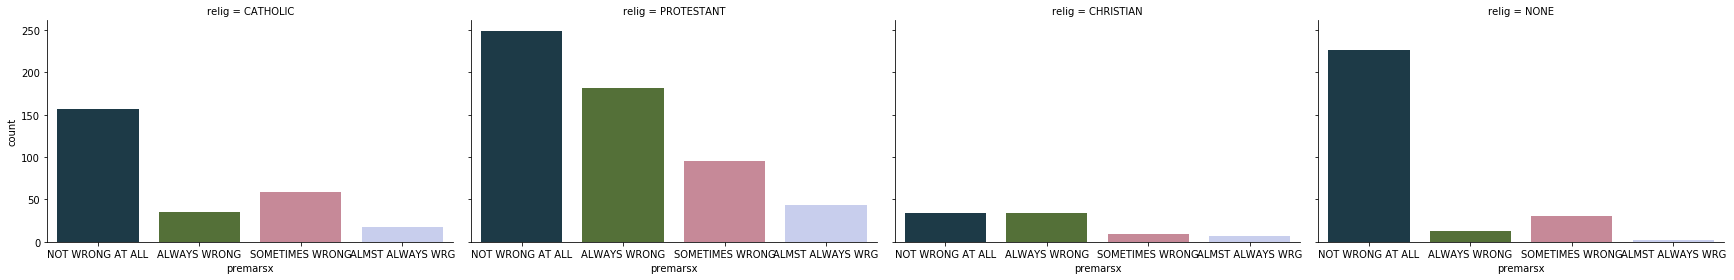

In [94]:
reglig = (df['relig'] == "PROTESTANT")|(df['relig']=="CATHOLIC")|(df['relig']=="NONE")|(df['relig']=="CHRISTIAN")
main_reglig = df[reglig]
reglig_count = main_reglig["relig"].value_counts()
plt.figure(figsize=(18,12))
sns.factorplot("premarsx", col="relig", col_wrap=4,data=main_reglig, kind="count", size=4, aspect=1.5,palette='cubehelix')


### 8. Heatmap

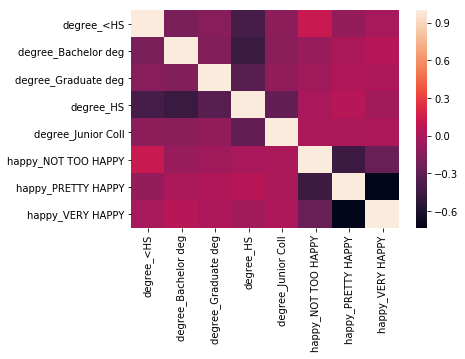

In [42]:
df_degree_happy = df[["degree", "happy"]]
df_degree_happy = pd.get_dummies(df_degree_happy)
sns.heatmap(df_degree_happy.corr())

### 9. Plot pie chart

22) Distribution of viewpoints on sex before marriage

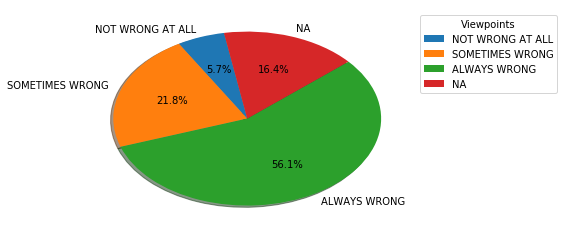

In [43]:
premarsx_counts = df.groupby('premarsx').size()
labels = ['NOT WRONG AT ALL', 'SOMETIMES WRONG', 'ALWAYS WRONG','NA']
plt.pie(premarsx_counts,autopct='%1.1f%%', labels=labels, shadow=True, startangle=100)
plt.legend(title="Viewpoints", bbox_to_anchor=(1, 1))

## Part2 Exploration write-up

Research question1: Is there a relationship between marital status, number of children and happiness? Specifically, if marital status and children the couples have could predict the level of happiness. 

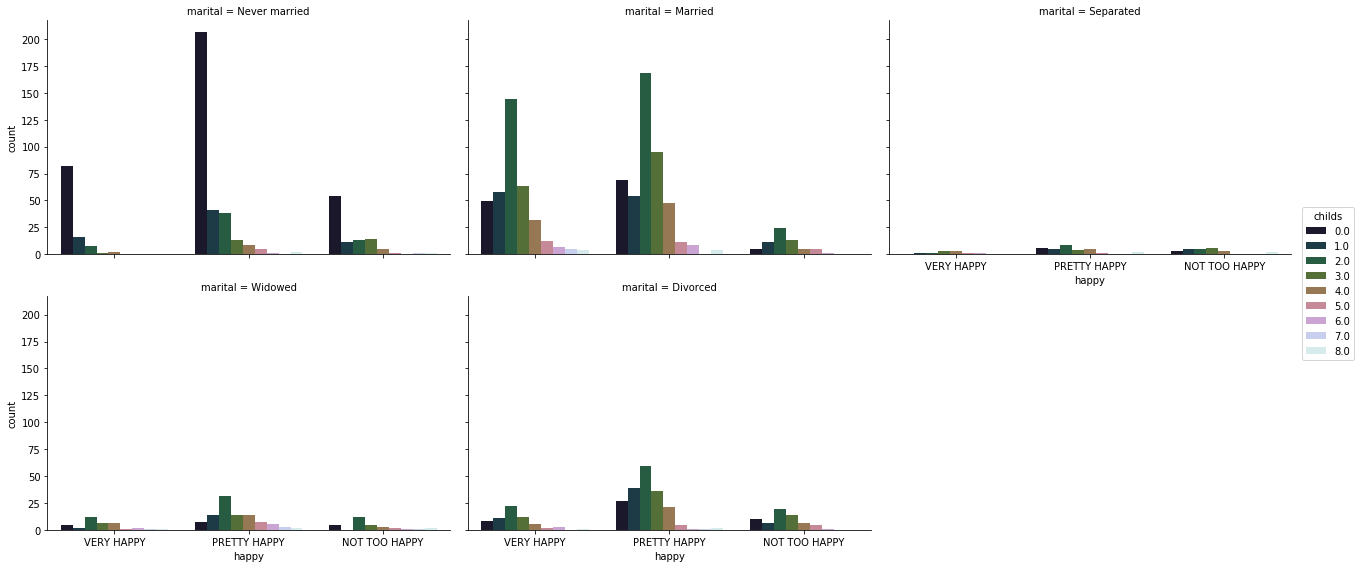

In [96]:
plt.figure(figsize=(18,12))
sns.factorplot("happy", col="marital", hue="childs", col_wrap=3,data=df, kind="count", size=4, aspect=1.5,palette='cubehelix')

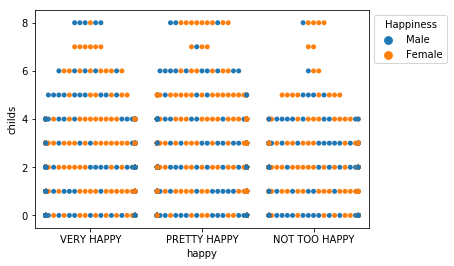

In [97]:
sns.swarmplot(x="happy", y="childs", hue="sex", data=df); 
plt.legend(title="Happiness", bbox_to_anchor=(1, 1))

From the first plot above, we can tell: 1) people who are married and have 2-3 children get higher happiness level than other groups; 2) People also feel pretty happy if they never get married and have no child; 3) more childs can't bring happiness. So it brings me a new question: what happens to marriage after having kids. Unfortunately, this brief study didn't collect data about people's happiness level before marriage and pre-marriage without kids. However, we can pretty sure that having too many kids may bring some burdens. The arrival of more children changes how couple interact. When kids are infancies, parents may sacrifice their romantic time to keep kids fed, bathed, and clothed. Therefore, a fully new day may be filled with questions about whether the diaper looks full and the best wish is to have a 6-hour undisturbed sleep. When kids are growing older, parents will begin to worry about their education and future. Particularly when children are developing their personalities, parenting is a tough thing. From the factorplot, we can see there are some unmarried couples but having kids. They may think they have skipped the wedding, but the relationship burden of having children is present regardless of marital status. But instead, they may suffer from higher burdens, from partner relationship as well as kids. 

Then, my next question is that if moms bear the heavist cost of parenting? That is, regardless of martial status, if moms have a lower happiness level with more children to feed. From the second swarmplot (NOT TOO HAPPY group), we can see it is moms, not fathers, who bear the parenting brunt. Fathers may feel more of the burden of financial responsiblity or feel less support from their spouses, but women are more likely to become the "on call" parent, the one who gets called by the school teacher and the one who keeps nagging at kids. At the same time, with more kids at home, moms have to shift their attention from work or socializing to childcare or housework, which may directly lead to social isolation, becoming disconnected from friends and collegues. Future study should stress more on the relationship between marital stress and mental health problems.  

Despite the dismal picture of parenting on lots of kids, most couples rate parenting on 2-3 kids as their greatest joy, since the rewards of watching their babies growing up is worth the cost of to their relationships. 

### Research question2: Is there a relationship between education background and the viewpoints on "Better for man to work, woman tend home"?

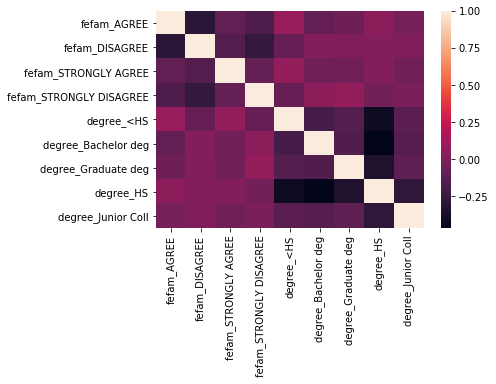

In [53]:
df_degree_fefam = df[["fefam","degree"]]
df_degree_fefam = pd.get_dummies(df_degree_fefam)
sns.heatmap(df_degree_fefam.corr())

Text(0.5,0,'Degree')

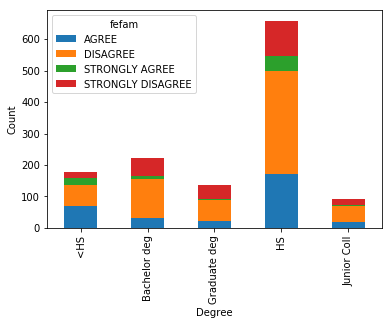

In [54]:
gb = df.groupby(['degree','fefam']).size().unstack()
gb.plot.bar(stacked=True)
plt.ylabel('Count')
plt.xlabel('Degree')

The question I address here is if education could change gender stereotype. From the plots, we can tell people who get lower education degree (e.g., lower than high school degree) are more likely to agree with the viewpoints on "Better for man to work, woman tend home", that is, they have higher tendency on gender stereotype. 

Gender roles are partially acquired through teacher and student interactions. Teachers are more permissive and biased toward boys in a positive way; they praise them more frequently and they attribute their achievement to their intelligence, while in the case of girls it is attributed to their diligence. It leaves an impression that male are easier to achieve anything naturally, while women are not. This further leads to a viewpoint that male should go outside to develop their careers, while women should be at home because there are chances that they cannot achieve anything if they behave like males to develop themselves. Besides, researchers of education have also cited the impact of textbooks and social media in transmitting role models. Normally, boys are portrayed in these books as independent-minded, whereas girls are passive. Girls should behave themselves by staying at cooking or doing chores, while boys should go socialing outside and get higher education. 

Education is a key to break gender stereotype. Girls and boys should have equal chance to get education and pursue their dreams. Education institutions from primary schools should present a wide variety in majors and courses. Teachers and parents should encourage students to choose not only gender-appropriate majors, but also should encourage women to go to ‘male-dominated’ fields and men to ‘female-dominated’ fields, so that children could come to be aware of their gender role attitudes, and know how they can change these attitudes.